In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
from sklearn import tree

# Enable inline plotting
%matplotlib inline

In [2]:
androidAppFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\Appomania\data\external\Android\googleplaystore.csv'
andDF = pd.read_csv(androidAppFilePath)
andDF.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
andRvFilePath = r'C:\Users\kumar\OneDrive\Documents\Projects\Appomania\data\external\Android\googleplaystore_user_reviews.csv'
andRevDF = pd.read_csv(andRvFilePath)
andRevDF.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
andWRevDF = pd.merge(andDF,andRevDF,on=['App'],how='left')

In [5]:
andWRevDF.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN


In [7]:
andWRevDF = andWRevDF.drop_duplicates()

In [9]:
andSentDF = andWRevDF.drop(columns=['Category','Size','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Translated_Review'])

In [10]:
andSentDF.head()

,App,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,"10,000+",NaN,NaN,NaN
1,Coloring book moana,3.9,967,"500,000+",Negative,-0.250,1.000000
2,Coloring book moana,3.9,967,"500,000+",Negative,-0.725,0.833333
3,Coloring book moana,3.9,967,"500,000+",Neutral,0.000,0.000000
4,Coloring book moana,3.9,967,"500,000+",NaN,NaN,NaN


In [11]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(andSentDF["App"])


LabelEncoder()

In [13]:
andSentDF["App"]= le.transform(andSentDF["App"]) 

#list(le.inverse_transform([2, 2, 1]))

In [17]:
andSentDF = andSentDF.dropna()

andSentDF.head()

,App,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,2632,3.9,967,"500,000+",Negative,-0.250,1.000000
2,2632,3.9,967,"500,000+",Negative,-0.725,0.833333
3,2632,3.9,967,"500,000+",Neutral,0.000,0.000000
5,2632,3.9,967,"500,000+",Positive,0.500,0.600000
6,2632,3.9,967,"500,000+",Negative,-0.800,0.900000


In [19]:
andSentDF.loc[andSentDF['Sentiment'] == 'Negative', 'Sentiment'] = -1
andSentDF.loc[andSentDF['Sentiment'] == 'Neutral', 'Sentiment'] = 0
andSentDF.loc[andSentDF['Sentiment'] == 'Positive', 'Sentiment'] = 1
andSentDF.head()

,App,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,2632,3.9,967,"500,000+",-1,-0.250,1.000000
2,2632,3.9,967,"500,000+",-1,-0.725,0.833333
3,2632,3.9,967,"500,000+",0,0.000,0.000000
5,2632,3.9,967,"500,000+",1,0.500,0.600000
6,2632,3.9,967,"500,000+",-1,-0.800,0.900000


In [26]:
andSentDF['Installs'] = andSentDF.Installs.str.replace("+","")
andSentDF['Installs'] = andSentDF.Installs.str.replace(",","")
andSentDF['Installs'] = andSentDF.Installs.astype('int64')

In [29]:
andSentDF.head()

,App,Rating,Reviews,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1,2632,3.9,967,500000,-1,-0.250,1.000000
2,2632,3.9,967,500000,-1,-0.725,0.833333
3,2632,3.9,967,500000,0,0.000,0.000000
5,2632,3.9,967,500000,1,0.500,0.600000
6,2632,3.9,967,500000,-1,-0.800,0.900000


In [30]:
# Run K-means Clustering - with clusters count as 0
# 0 because of number of genres

from sklearn.cluster import KMeans
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(andSentDF)
# Predicting the clusters
labels = kmeans.predict(andSentDF)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [35]:
# To Print the Clusters
import numpy as np
clustersTemp=kmeans.fit_predict(andSentDF)
#print clusters.shape
cluster_0t=np.where(clustersTemp==0)
print(cluster_0t)

(array([    0,     1,     2, ..., 40381, 40382, 40383], dtype=int64),)


In [177]:
le.inverse_transform(andSentDF.iloc[list(np.where(clustersTemp==1))[0]]['App'].unique()[:50])

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Gmail', 'Hangouts', 'Facebook', 'Google+', 'Google Photos',
       'Google Street View', 'Google', 'Google News'], dtype=object)

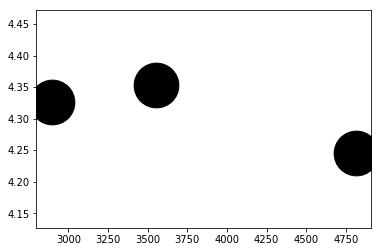

In [33]:

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=2000);

In [52]:
andSentGrpdDF = andSentDF.groupby(['App'])['Rating','Reviews','Installs','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'].mean()

In [74]:
# Run K-means Clustering - with clusters count as 0
# 0 because of number of genres

from sklearn.cluster import KMeans
# Initializing KMeans
kmeanGrp = KMeans(n_clusters=4)
# Fitting with inputs
kmeanGrp = kmeanGrp.fit(andSentGrpdDF)
# Predicting the clusters
labelsGrp = kmeanGrp.predict(andSentGrpdDF)
# Getting the cluster centers
CGrp = kmeanGrp.cluster_centers_

In [75]:
import numpy as np
clustersGrp=kmeanGrp.fit_predict(andSentGrpdDF)
#print clusters.shape
clustersGrp_0t=np.where(clustersGrp==0)
#print(clustersGrp_0t)

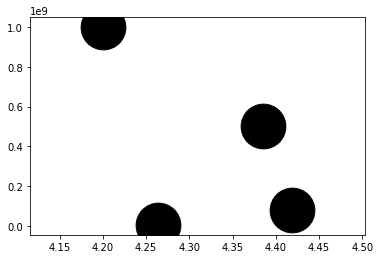

In [76]:
centersGrp = kmeanGrp.cluster_centers_
plt.scatter(centersGrp[:, 0], centersGrp[:, 1], c='black', s=2000);

In [171]:
le.inverse_transform((andSentGrpdDF.iloc[list(np.where(clustersGrp==0))[0],:]).index)[:5]

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['2GIS: directory & navigator', '8 Ball Pool',
       'APUS Launcher - Theme, Wallpaper, Hide Apps', 'Account Manager',
       'AccuWeather: Daily Forecast & Live Weather Reports'], dtype=object)

In [81]:
andSentGrpdDF.iloc[list(np.where(clustersGrp==3))[0],:]

,Rating,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,,
2364,4.4,500000000.0,-0.100000,0.031068,0.456293
3480,4.4,500000000.0,0.500000,0.236331,0.443636
4332,4.3,500000000.0,-0.068966,-0.000991,0.456127
4524,4.4,500000000.0,0.769231,0.385865,0.433822
4819,4.2,500000000.0,0.078947,0.064587,0.517172
4925,4.6,500000000.0,0.722222,0.285690,0.497991
4945,4.4,500000000.0,1.000000,0.214167,0.490000


In [83]:
andSentGrpdDF.iloc[list(np.where(clustersGrp==1))[0],:]

,Rating,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,,
4328,4.1,1.000000e+09,-0.046154,-0.005909,0.460871
4869,4.3,1.000000e+09,0.200000,0.058016,0.456138
4912,4.4,1.000000e+09,0.657895,0.260359,0.492744
4933,3.9,1.000000e+09,0.350000,0.093930,0.501439
4937,4.5,1.000000e+09,0.514851,0.187021,0.509305
4944,4.2,1.000000e+09,-0.750000,-0.500000,0.691667
4949,4.2,1.000000e+09,1.000000,0.368056,0.469444
5118,4.0,1.000000e+09,0.600000,0.239355,0.525005


In [144]:
temp = andSentGrpdDF.drop(columns=['Installs'])
from sklearn.decomposition import PCA # Principal Component Analysis module
pca = PCA(n_components=4)
x_9d = pca.fit_transform(temp)

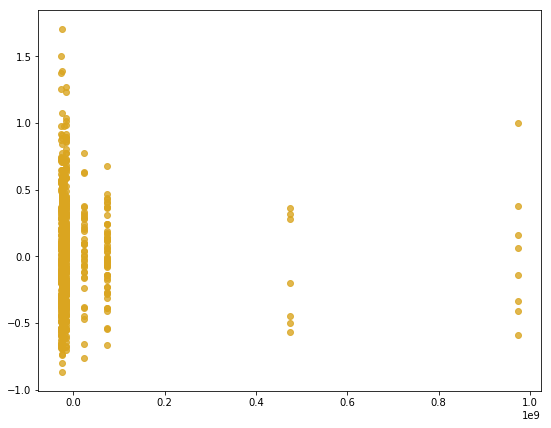

In [137]:
plt.figure(figsize = (9,7))
plt.scatter(x_9d[:,0],x_9d[:,1], c='goldenrod',alpha=0.8)
plt.show()

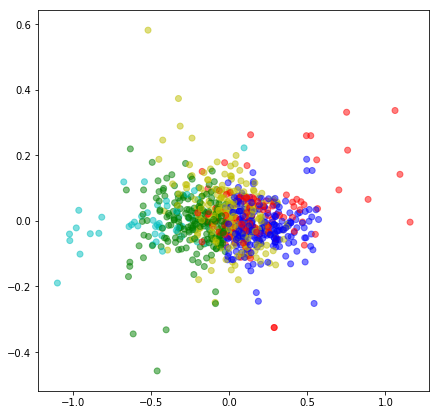

In [145]:
# Set a 3 KMeans clustering
kmeansPCA = KMeans(n_clusters=5)
# Compute cluster centers and predict cluster indices
X_clustered = kmeansPCA.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y',4:'c'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]



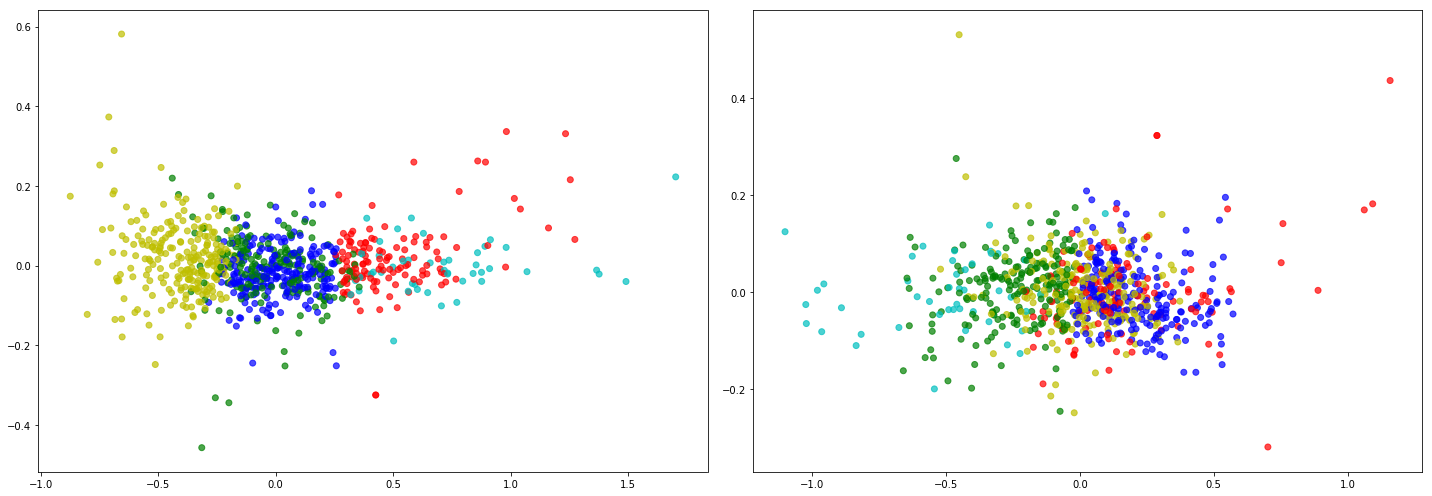

In [195]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(1,2,figsize = (20,7))
#axarr[0].plot(x, y)
#axarr[0].set_title('Sharing X axis')
#axarr[1].scatter(x, y)

# Plot the scatter digram
#plt.figure(figsize = (20,10))
axarr[0].scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.7) 
# Plot the scatter digram

axarr[1].scatter(x_9d[:,1],x_9d[:,3], c= label_color, alpha=0.7) 
plt.tight_layout()
plt.show()

In [147]:
# Create a temp dataframe from our PCA projection data "x_9d"
plotPCADF = pd.DataFrame(x_9d)
plotPCADF = plotPCADF[[0,1,2,3]] # only want to visualise relationships between first 3 projections
plotPCADF['X_cluster'] = X_clustered

C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kumar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


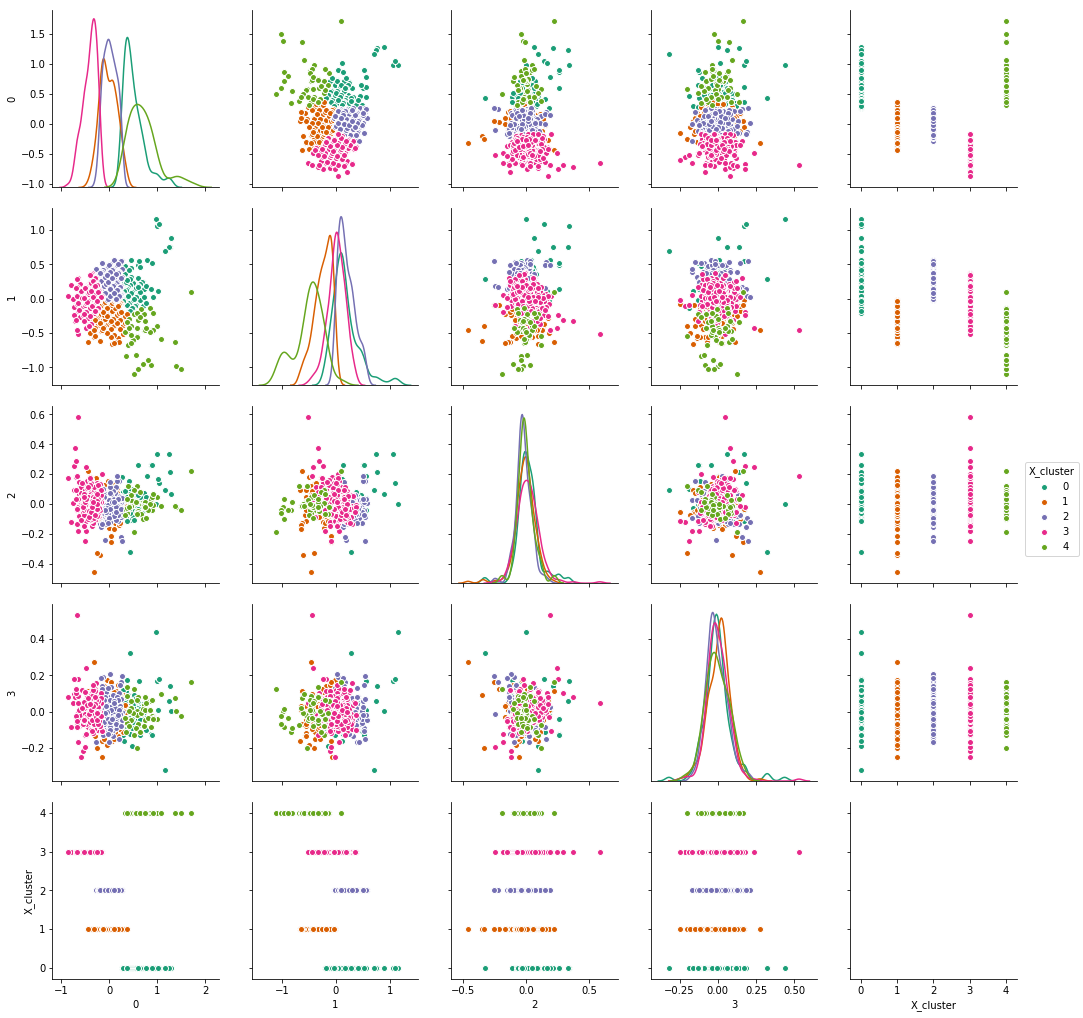

In [150]:
import seaborn as sns # More snazzy plotting library
sns.pairplot(plotPCADF, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=2.85)

In [169]:


from IPython.display import HTML, display
import tabulate
table = [le.inverse_transform((andSentGrpdDF.iloc[list(np.where(X_clustered==0))[0],:]).index),
         le.inverse_transform((andSentGrpdDF.iloc[list(np.where(X_clustered==1))[0],:]).index),
         ["Moon",1737,73.5],
         ["Mars",3390,641.85]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

ModuleNotFoundError: No module named 'tabulate'

In [168]:
kmeansPCA.cluster_centers_

array([[ 5.06888133e-01,  1.80828139e-01,  1.92736967e-02,
         9.11419432e-05],
       [-2.35706344e-02, -2.37792917e-01, -8.33435496e-03,
         6.98856843e-03],
       [ 1.50479261e-02,  1.98395560e-01, -1.97672244e-02,
        -7.38235431e-03],
       [-4.07371152e-01,  1.25750512e-02,  1.67586612e-02,
         1.96579014e-03],
       [ 7.02838503e-01, -4.99997171e-01, -3.60626181e-03,
        -3.37015723e-03]])